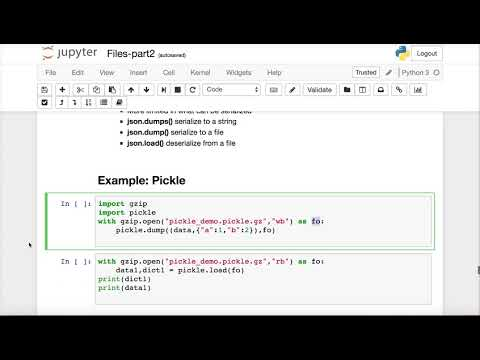

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("pcGz2zmA-vU", height=600)

# Files: Over the Web and Common Formats

In [2]:
import os



In [3]:
DATADIR = os.path.join(os.path.expanduser("~"),"DATA")
os.path.exists(DATADIR)

True

## Reading over the Web

### Big changes from Python 2.x

* **[urllib](https://docs.python.org/3/library/urllib.html)** "urllib is a package that collects several modules for working with URLs"
* **[urllib.request]()** module

### [See this HOWTO](https://docs.python.org/3/howto/urllib2.html)

### Demonstration
#### Reading the `www.python.org` web page

* `response` acts similar to a standard file object
* `display` and `HTML` are IPython functions that helps us display what we just read
```Python
import urllib.request
import IPython.display
from IPython.display import HTML, display
with urllib.request.urlopen("http://www.python.org") as response:
    pythonTxt = response.read().decode('utf-8')
display(HTML(pythonTxt))
```

In [4]:
import urllib.request
import IPython.display
from IPython.display import HTML, display
with urllib.request.urlopen("http://www.python.org") as response:
    pythonTxt = response.read().decode('utf-8')
display(HTML(pythonTxt))

Industrial Light & Magic Runs on Python by Tim Fortenberry


### Demonstration
#### Reading a csv file from GitHub

* [`StringIO`](https://docs.python.org/3/library/io.html#io.StringIO) Lets us treat a string like a file
* We first read the webdata into a string `f0.read().decode()
* This string is then converted into a file-like object with `StringIO`
* This file-like ojbect is then passed to the csv reader.

```Python
kb = "https://raw.githubusercontent.com/chapmanbe/pyConTextNLP/master/KB/lexical_kb_04292013.tsv"
from io import StringIO
with urllib.request.urlopen(kb) as f0:
    data = list(csv.reader(StringIO(f0.read().decode()), delimiter="\t" ))
print(data)
```

In [5]:
import csv
kb = "https://raw.githubusercontent.com/chapmanbe/pyConTextNLP/master/KB/lexical_kb_04292013.tsv"
from io import StringIO
with urllib.request.urlopen(kb) as f0:
    data = list(csv.reader(StringIO(f0.read().decode()), delimiter="\t" ))
for d in data:
    print(d)

['Lex', 'Type', 'Regex', 'Direction', '', '', '']
['are ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['be ruled out', 'INDICATION', '', 'backward', '', '', '']
['being ruled out', 'INDICATION', '', 'backward', '', '', '']
['can be ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['cannot be excluded', 'AMBIVALENT_EXISTENCE', '', 'backward', '', '', '']
['cannot totally be excluded', 'PROBABLE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['could be ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['examination', 'INDICATION', '\\b(examination|exam|study)\\b', 'backward', '', '', '']
['free', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['has been ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['have been ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', '']
['is in the differential', 'AMBIVALENT_EXISTENCE', 'is\\sin\\sthe\\sdifferential', 'backward', '', '', '']
['is

# Reading compressed files
* gzip
    * Allows me to open a compressed file as if it were a normal file
    * Read and write the same as the regular **open()** command


## Serialization
* Tedious to convert everything to a string
* See if Python can help you
* **Pickle**
    * Python specific
    * Allows for arbitrarily complex Python structures
        * Some limits as to what can be pickled
    * Insecure
* **json** (JavaScript Object Notation)
    * Common data exchange format
    * More limited in what can be serialized
    * **json.dumps()** serialize to a string
    * **json.dump()** serialize to a file
    * **json.load()** deserialize from a file

## Example: Pickle

In [6]:
import gzip
import pickle
with gzip.open("pickle_demo.pickle.gz","wb") as fo:
    pickle.dump((data,{"a":1,"b":2}),fo)


In [7]:
with gzip.open("pickle_demo.pickle.gz","rb") as fo:
    data1,dict1 = pickle.load(fo)
print(dict1)
print(data1)
    

{'a': 1, 'b': 2}
[['Lex', 'Type', 'Regex', 'Direction', '', '', ''], ['are ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['be ruled out', 'INDICATION', '', 'backward', '', '', ''], ['being ruled out', 'INDICATION', '', 'backward', '', '', ''], ['can be ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['cannot be excluded', 'AMBIVALENT_EXISTENCE', '', 'backward', '', '', ''], ['cannot totally be excluded', 'PROBABLE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['could be ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['examination', 'INDICATION', '\\b(examination|exam|study)\\b', 'backward', '', '', ''], ['free', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['has been ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['have been ruled out', 'DEFINITE_NEGATED_EXISTENCE', '', 'backward', '', '', ''], ['is in the differential', 'AMBIVALENT_EXISTENCE', 'is\\sin\\sthe\\sdifferential'

## Example: JSON

In [8]:
import json
with open("json_demo.json","w") as fo:
    json.dump((dict1,data1),fo)
    

In [9]:
with open("json_demo.json","r") as fo:
    txt2 = fo.read()
txt2


'[{"a": 1, "b": 2}, [["Lex", "Type", "Regex", "Direction", "", "", ""], ["are ruled out", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["be ruled out", "INDICATION", "", "backward", "", "", ""], ["being ruled out", "INDICATION", "", "backward", "", "", ""], ["can be ruled out", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["cannot be excluded", "AMBIVALENT_EXISTENCE", "", "backward", "", "", ""], ["cannot totally be excluded", "PROBABLE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["could be ruled out", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["examination", "INDICATION", "\\\\b(examination|exam|study)\\\\b", "backward", "", "", ""], ["free", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["has been ruled out", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["have been ruled out", "DEFINITE_NEGATED_EXISTENCE", "", "backward", "", "", ""], ["is in the differential", "AMBIVALENT_EXISTENCE", "is\\\\sin\\\\sthe\\\\s

In [10]:
with open("json_demo.json","r") as fo:
    data1,dict1 = json.load(fo)
print(data1)

{'a': 1, 'b': 2}


## Reading/Writing Images
* [PIL/Pillow](https://python-pillow.org/)
    * pip install Image
* [SimpleITK](http://www.simpleitk.org/) (N-dimensional images)
    * easy_install SimpleITK
    * Big package for dealing with N-dimensional images
    * Includes image segmentation
* scipy
    * pip install scipy
* [scikit-image](http://scikit-image.org/)
### [EXIF](https://en.wikipedia.org/wiki/Exif)

JPEG and TIFF images follow the EXIF format. We can use EXIF readers to get the header information about the image.

## Example
### Reading in image with scipy and displaying with matplotlib

In [11]:
import matplotlib.pyplot as pp
from scipy.misc import imread, imresize, imsave
img = imread(os.path.join(DATADIR,"Images","CCTSPhi_000061_mipz.png"))
#pp.imshow(img)
#pp.show()
img2 = imresize(img,0.25)
print (img.shape)
pp.imshow(img2)
pp.show()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


(769, 512)


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


<Figure size 640x480 with 1 Axes>

## Example
### Reading and Displaying images with scikit-image

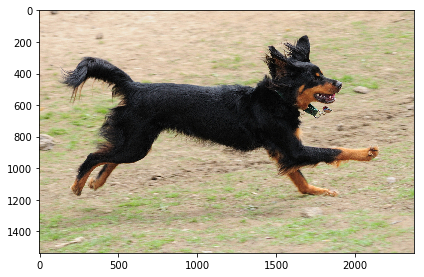

In [12]:
import skimage.io as io


img = io.imread("dog.jpg")
io.imshow(img)

#### We can also save images

In [13]:
io.imsave("dog2.png", img)

In [14]:
!ls -ltra


total 6345
-rw-r--r-- 1 u0069295 users   12957 Oct 12 20:10 Files-part2.ipynb
-rw-r--r-- 1 u0069295 users 1123174 Oct 12 20:10 dog.jpg
-rw-r--r-- 1 u0069295 users       0 Oct 12 20:11 mytestFile4.txt
-rw-r--r-- 1 u0069295 users     119 Oct 12 20:12 myTestFile.txt
-rw-r--r-- 1 u0069295 users    7057 Oct 12 20:12 top100-icd9.txt
-rw-r--r-- 1 u0069295 users  191569 Oct 12 20:12 Files-part1.ipynb
drwxr-xr-x 2 u0069295 users    4096 Oct 12 20:12 .ipynb_checkpoints
drwxr-xr-x 5 u0069295 users    4096 Oct 12 20:12 ..
-rw-r--r-- 1 u0069295 users    8782 Oct 12 20:13 pickle_demo.pickle.gz
-rw-r--r-- 1 u0069295 users   28053 Oct 12 20:13 json_demo.json
drwxr-xr-x 3 u0069295 users    4096 Oct 12 20:13 .
-rw-r--r-- 1 u0069295 users 5111141 Oct 12 20:13 dog2.png


In [15]:
!pip install exifread

  Running setup.py bdist_wheel for exifread ... done
  Stored in directory: /home/u0069295/.cache/pip/wheels/a2/82/de/fd5f70739a3c8d7475cc21f4e186150abbc5d77180af7d94a2
Successfully built exifread


In [16]:
import exifread
with open("dog.jpg",'rb') as f0:
    tags = exifread.process_file(f0)
tags

{'Image Make': (0x010F) ASCII=NIKON CORPORATION @ 98,
 'Image Model': (0x0110) ASCII=NIKON D300 @ 116,
 'Image XResolution': (0x011A) Ratio=72 @ 128,
 'Image YResolution': (0x011B) Ratio=72 @ 136,
 'Image Software': (0x0131) ASCII=Photos 2.0 @ 144,
 'Image DateTime': (0x0132) ASCII=2008:04:22 12:36:55 @ 156,
 'Image ExifOffset': (0x8769) Long=176 @ 90,
 'EXIF ExposureTime': (0x829A) Ratio=1/400 @ 614,
 'EXIF FNumber': (0x829D) Ratio=71/10 @ 622,
 'EXIF ExposureProgram': (0x8822) Short=Shutter Priority @ 210,
 'EXIF ISOSpeedRatings': (0x8827) Short=400 @ 222,
 'EXIF ExifVersion': (0x9000) Undefined=0220 @ 234,
 'EXIF DateTimeOriginal': (0x9003) ASCII=2008:04:22 12:36:55 @ 630,
 'EXIF DateTimeDigitized': (0x9004) ASCII=2008:04:22 12:36:55 @ 650,
 'EXIF ComponentsConfiguration': (0x9101) Undefined=YCbCr @ 270,
 'EXIF ExposureBiasValue': (0x9204) Signed Ratio=0 @ 670,
 'EXIF MaxApertureValue': (0x9205) Ratio=9/2 @ 678,
 'EXIF MeteringMode': (0x9207) Short=Pattern @ 306,
 'EXIF LightSource'

## Sound Files

In [17]:
from IPython.display import Audio
import scipy.io.wavfile as wavfile

### Wave file is characterized by 
* ``rate``: integer Sampling rate in Hz
* ``data``: numpy array of time series

In [18]:
rate,data = wavfile.read(os.path.join(DATADIR,"Numerics", "Audio","rub.wav"))


In [19]:
Audio(data=data,rate=2*rate)

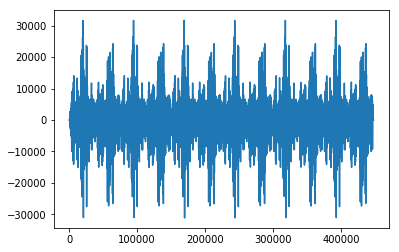

In [20]:
pp.plot(data)


## [DICOM](https://en.wikipedia.org/wiki/DICOM)

The standard image format for medical images is DICOM. DICOM image headers contain medical specific 

In [21]:
import dicom

ImportError: 
Pydicom via 'import dicom' has been removed in pydicom version 1.0.
Please install the `dicom` package to restore function of code relying
on pydicom 0.9.9 or earlier. E.g. `pip install dicom`.
Alternatively, most code can easily be converted to pydicom > 1.0 by
changing import lines from 'import dicom' to 'import pydicom'.
See the Transition Guide at
https://pydicom.github.io/pydicom/stable/transition_to_pydicom1.html.


In [22]:
dcm = dicom.read_file(os.path.join(DATADIR, "Images", "PE", "Ser_000006", "IM-0124-0097.dcm"))

NameError: name 'dicom' is not defined

In [ ]:
print(dcm)

In [ ]:

io.imshow(dcm.pixel_array, cmap='gray')